In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
import numpy as np
from AnalysisUtils.analysis_utils import *

### Reads data of fm records and input bar data

In [2]:
%%time
duka_5m_df = pd.read_csv("../data/yht_duka_5m_eur_with_floatingprofits_table.csv", index_col=["datetime"])
duka_5m_df = reverse_df(duka_5m_df)
duka_5m_df.head()

CPU times: user 41.1 ms, sys: 8.09 ms, total: 49.2 ms
Wall time: 48.9 ms


,symbol,open,high,low,close,volume,floating_profit
datetime,,,,,,,
2021-07-09 05:05:00,EURUSD,1.18334,1.18347,1.18331,1.18337,370.50,0.0
2021-07-09 05:00:00,EURUSD,1.18318,1.18335,1.18318,1.18333,362.19,0.0
2021-07-09 04:55:00,EURUSD,1.18371,1.18371,1.18317,1.18318,449.08,0.0
2021-07-09 04:50:00,EURUSD,1.18356,1.18377,1.18356,1.18370,270.00,0.0
2021-07-09 04:45:00,EURUSD,1.18354,1.18361,1.18347,1.18355,247.30,0.0


In [3]:
%%time
yht_rc_big_table_df = pd.read_csv("../data/yht_eur_big_table.csv", index_col=["dt_point_holding"])
yht_rc_big_table_df.head()

CPU times: user 156 ms, sys: 16 ms, total: 172 ms
Wall time: 172 ms


,symbol,action,lots,open_date,close_date,open_price,close_price,profits,pips,commission,...,profits_calc,commission_by_pips,date_var,swap_per_date_var_and_pip,open_date_mod_5,close_date_mod_5,dt_range,dt_point_holding.1,dt_range_inter_num,cur_holding_cnt
dt_point_holding,,,,,,,,,,,,,,,,,,,,,
2020-10-14 10:05:00,EURUSD,sell,0.01,2020-10-14 10:08:18,2020-10-14 12:31:20,1.17321,1.17625,-3.04,-30.4,-0.04,...,-3.08,-0.4,0,0.0,2020-10-14 10:05:00,2020-10-14 12:30:00,0 days 02:25:00,2020-10-14 10:05:00,30,1
2020-10-14 10:10:00,EURUSD,sell,0.01,2020-10-14 10:08:18,2020-10-14 12:31:20,1.17321,1.17625,-3.04,-30.4,-0.04,...,-3.08,-0.4,0,0.0,2020-10-14 10:05:00,2020-10-14 12:30:00,0 days 02:25:00,2020-10-14 10:10:00,30,1
2020-10-14 10:15:00,EURUSD,sell,0.01,2020-10-14 10:08:18,2020-10-14 12:31:20,1.17321,1.17625,-3.04,-30.4,-0.04,...,-3.08,-0.4,0,0.0,2020-10-14 10:05:00,2020-10-14 12:30:00,0 days 02:25:00,2020-10-14 10:15:00,30,1
2020-10-14 10:20:00,EURUSD,sell,0.01,2020-10-14 10:08:18,2020-10-14 12:31:20,1.17321,1.17625,-3.04,-30.4,-0.04,...,-3.08,-0.4,0,0.0,2020-10-14 10:05:00,2020-10-14 12:30:00,0 days 02:25:00,2020-10-14 10:20:00,30,1
2020-10-14 10:25:00,EURUSD,sell,0.01,2020-10-14 10:08:18,2020-10-14 12:31:20,1.17321,1.17625,-3.04,-30.4,-0.04,...,-3.08,-0.4,0,0.0,2020-10-14 10:05:00,2020-10-14 12:30:00,0 days 02:25:00,2020-10-14 10:25:00,30,2


In [4]:
%%time
from Utils.data_get_utils import get_fm_rc_data_df
yht_rc_df = get_fm_rc_data_df("../data/yht_rc.csv")
yht_rc_df = yht_rc_df[yht_rc_df["symbol"]=="EURUSD"]
yht_rc_df.head()

CPU times: user 142 ms, sys: 0 ns, total: 142 ms
Wall time: 142 ms


,symbol,action,lots,open_date,close_date,open_price,close_price,profits,pips,commission,swaps,profits_calc,commission_by_pips,date_var,swap_per_date_var_and_pip
10,EURUSD,buy,0.01,2021-07-09 02:05:44,2021-07-09 03:08:27,1.18363,1.18375,0.12,1.2,-0.04,0.0,0.08,-0.4,0,0.0
11,EURUSD,buy,0.01,2021-07-08 15:41:46,2021-07-08 15:52:30,1.18410,1.18440,0.30,3.0,-0.04,0.0,0.26,-0.4,0,0.0
12,EURUSD,sell,0.01,2021-07-08 13:55:29,2021-07-08 14:59:42,1.18600,1.18538,0.62,6.2,-0.05,0.0,0.57,-0.5,0,0.0
13,EURUSD,sell,0.01,2021-07-08 14:29:13,2021-07-08 14:48:43,1.18640,1.18613,0.27,2.7,-0.05,0.0,0.22,-0.5,0,0.0
14,EURUSD,sell,0.01,2021-07-08 13:32:00,2021-07-08 13:46:35,1.18589,1.18543,0.46,4.6,-0.05,0.0,0.41,-0.5,0,0.0


### Selects a datetime to analyze

In [5]:
# Needs to -2 or -3 (hours) for tickmill timeframe
selected_date = "2021-04-30 18:55:00"

In [6]:
duka_5m_df[duka_5m_df.index==selected_date]

,symbol,open,high,low,close,volume,floating_profit
datetime,,,,,,,
2021-04-30 18:55:00,EURUSD,1.20247,1.20259,1.2021,1.2021,582.98,-10.05


In [7]:
yht_rc_big_table_df[(yht_rc_big_table_df.index==selected_date)]["lots"].sum()

0.07

In [8]:
yht_rc_big_table_df[(yht_rc_big_table_df.index==selected_date)].profits_calc.sum()

-5.390000000000411

### time range analysis(only for tickmill records, the records from other platforms => adjust the timedelta)

In [9]:
from datetime import timedelta
# start_dt, end_dt="2021-04-30 14:45:00","2021-05-03 00:45:00"
# start_dt, end_dt="2021-05-03 13:40:00","2021-05-03 16:40:00"
# start_dt, end_dt="2021-05-06 11:30:00","2021-05-06 14:35:00"
# start_dt, end_dt="2021-05-07 14:05:00","2021-05-07 17:15:00"
# start_dt, end_dt = "2021-05-12 15:00:00","2021-05-12 20:55:00"
# start_dt, end_dt = "2021-05-24 08:05:00","2021-05-25 23:05:00"
# start_dt, end_dt = "2021-06-11 13:30:00","2021-06-11 15:50:00"
start_dt, end_dt = "2020-06-11 13:30:00","2021-07-24 15:50:00"
start_dt, end_dt = str(pd.to_datetime(start_dt) - timedelta(hours=3)), str(pd.to_datetime(end_dt) - timedelta(hours=3))

In [10]:
yht_rc_df.tail()

,symbol,action,lots,open_date,close_date,open_price,close_price,profits,pips,commission,swaps,profits_calc,commission_by_pips,date_var,swap_per_date_var_and_pip
4989,EURUSD,sell,0.01,2020-10-14 12:35:56,2020-10-14 13:05:20,1.17640,1.17595,0.45,4.5,-0.04,0.0,0.41,-0.4,0,0.0
4990,EURUSD,sell,0.01,2020-10-14 12:09:50,2020-10-14 12:31:20,1.17494,1.17625,-1.31,-13.1,-0.04,0.0,-1.35,-0.4,0,0.0
4991,EURUSD,sell,0.01,2020-10-14 11:43:04,2020-10-14 12:31:20,1.17436,1.17625,-1.89,-18.9,-0.04,0.0,-1.93,-0.4,0,0.0
4992,EURUSD,sell,0.01,2020-10-14 10:29:19,2020-10-14 12:31:20,1.17359,1.17625,-2.66,-26.6,-0.04,0.0,-2.70,-0.4,0,0.0
4993,EURUSD,sell,0.01,2020-10-14 10:08:18,2020-10-14 12:31:20,1.17321,1.17625,-3.04,-30.4,-0.04,0.0,-3.08,-0.4,0,0.0


In [11]:
yht_rc_ana_df = yht_rc_df[(yht_rc_df["open_date"] >= start_dt) & (yht_rc_df["open_date"] <= end_dt)]
duka_5m_ana_df = duka_5m_df[(duka_5m_df.index >= start_dt) & (duka_5m_df.index <= end_dt)]
duka_5m_ana_df.head()

,symbol,open,high,low,close,volume,floating_profit
datetime,,,,,,,
2021-07-09 05:05:00,EURUSD,1.18334,1.18347,1.18331,1.18337,370.50,0.0
2021-07-09 05:00:00,EURUSD,1.18318,1.18335,1.18318,1.18333,362.19,0.0
2021-07-09 04:55:00,EURUSD,1.18371,1.18371,1.18317,1.18318,449.08,0.0
2021-07-09 04:50:00,EURUSD,1.18356,1.18377,1.18356,1.18370,270.00,0.0
2021-07-09 04:45:00,EURUSD,1.18354,1.18361,1.18347,1.18355,247.30,0.0


finally profits:  772.0399999999927
maxDD:  816.1499999999969
total # of trades:  1890
total lots:  47.67000000000001
profits / madDD:  0.9459535624578761


<AxesSubplot:>

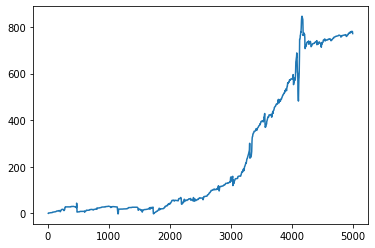

In [15]:
total_profits = yht_rc_ana_df["profits_calc"].sum()
maxDD = -(duka_5m_ana_df["floating_profit"].min()) if duka_5m_ana_df["floating_profit"].min() != 0 else 1e-10
p_divide_mdd = -1 if abs(total_profits / maxDD) > 1e+9 or total_profits == 0 else abs(total_profits / maxDD)
print("finally profits: ", total_profits)
print("maxDD: ", maxDD)
print("total # of trades: ", yht_rc_ana_df["symbol"].count())
print("total lots: ", yht_rc_ana_df["lots"].sum())
print("profits / madDD: ", p_divide_mdd)
# duka_5m_ana_df["floating_profit"].plot()
yht_rc_ana_df["profits_calc"].cumsum().plot()

In [ ]:
yht_rc_df